# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')
import numpy as np
import pandas as pd
import random

In [2]:
from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr, spearmanr

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [3]:
temp = pd.read_csv("/Users/victorramos/documents/ironhack/labs/week_5/lab-descriptive-stats/your-code/Temp_States.csv")


#### Print `temp`

In [4]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [5]:
temp = pd.DataFrame(temp)
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


In [6]:
temp.dtypes 

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [8]:
# your answer here

ny_temp = temp[temp["State"] == "New York"]
ny_temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [10]:
# your answer here
average_temp_ny = ny_temp["Temperature"].mean()
average_temp_ny

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [12]:
# your answer here
temp_above_15 = temp[temp["Temperature"] > 15]
temp_above_15[["City", "State", "Temperature"]]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [13]:
temp_above_15[["City", "State", "Temperature"]]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [18]:
# your answer here
temp_between_15_12 = temp[(temp["Temperature"] > 15) & (temp["Temperature"] < 20)]
temp_between_15_12[["City", "State", "Temperature"]]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [20]:
# your answer here
grouped = temp.groupby("State")
mean_temps = grouped["Temperature"].mean()
std_temps = grouped["Temperature"].std()
print("Mean temperatures by state:\n", mean_temps)
print("Standard deviations of temperatures by state:\n", std_temps)


Mean temperatures by state:
 State
Connecticut    15.833333
New Jersey     21.111111
New York       10.740741
Name: Temperature, dtype: float64
Standard deviations of temperatures by state:
 State
Connecticut    1.964186
New Jersey     1.571348
New York       8.133404
Name: Temperature, dtype: float64


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [26]:
# your answer here
employee = pd.read_csv("/Users/victorramos/documents/ironhack/labs/week_5/lab-descriptive-stats/your-code/employee.csv")
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [25]:
# your answer here

employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

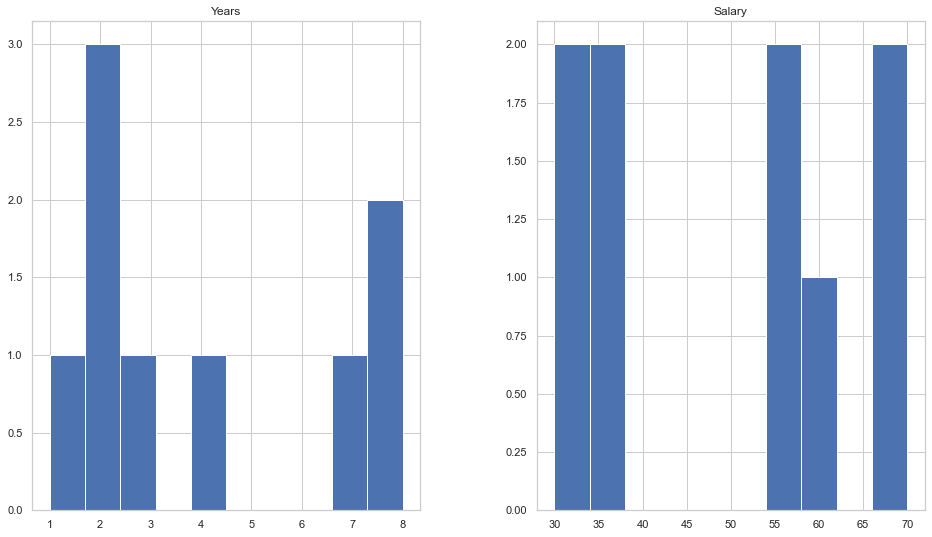

In [27]:
# your answer here
import matplotlib.pyplot as plt
employee.hist()
plt.show()


#The histograms show the distribution of the data for each column, where the x-axis represents the values of the column and the y-axis represents the frequency of each value.

#### What's the average salary in this company?

In [28]:
# your answer here
average_salary = employee["Salary"].mean()
average_salary

48.888888888888886

#### What's the highest salary?

In [31]:
# your answer here
maximum_salary = employee["Salary"].max()
maximum_salary

70

#### What's the lowest salary?

In [32]:
# your answer here
min_salary = employee["Salary"].min()
min_salary

30

#### Who are the employees with the lowest salary?

In [ ]:
temp_above_15 = temp[temp["Temperature"] > 15]
temp_above_15[["City", "State", "Temperature"]]

#### Could you give all the information about an employee called David?

In [40]:
# your answer here
lowest_salary = employee.nsmallest(1, "Salary")
print( lowest_salary)


    Name Department Education Gender    Title  Years  Salary
1  Maria         IT    Master      F  analyst      2      30


#### Could you give only David's salary?

In [41]:
# your answer here
davids_row = employee[employee["Name"] == "David"]
davids_salary = davids_row["Salary"].values[0]
print("David's salary:", davids_salary)


David's salary: 30


#### Print all the rows where job title is associate

In [43]:
# your answer here
associates = employee[employee["Title"] == "associate"]
associates


,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [20]:
# your answer here- 1 method


In [21]:
# your answer here- 2nd method


#### Find the employees who's title is associate and the salary above 55?

In [44]:
# your answer here
associate_above_55 = employee[(employee["Title"] == "associate") & (employee["Salary"] > 55)]
associate_above_55

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [45]:
# your answer here
grouped = employee.groupby("Years")
mean_years_salary = grouped["Salary"].mean()
print( mean_years_salary)



Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64


####  What is the average Salary per title?

In [49]:
# your answer here
grouped_title = employee.groupby("Title")
mean_title_salary = grouped_title["Salary"].mean()


mean_title_salary_df = pd.DataFrame(mean_title_salary)
mean_title_salary_df

,Salary
Title,
VP,70.000000
analyst,32.500000
associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

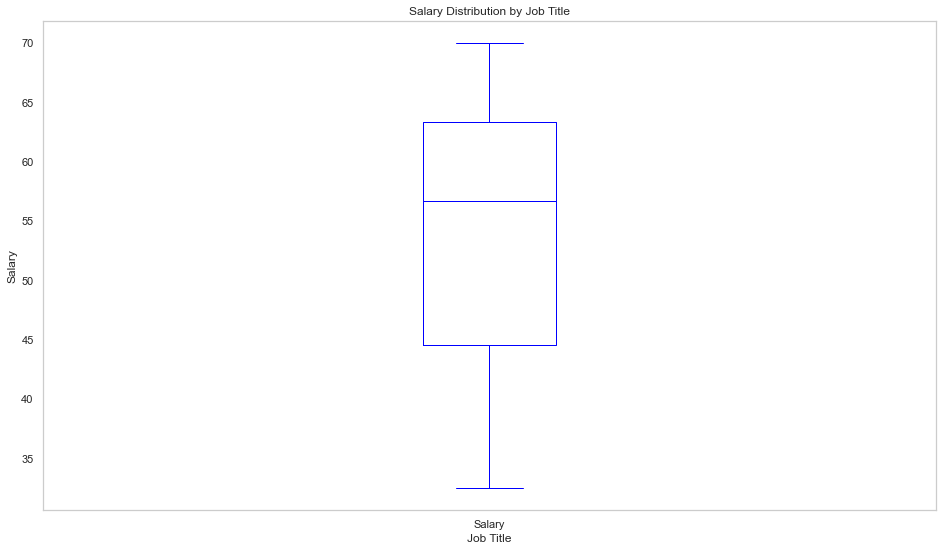

In [54]:
# draw boxplot here
import matplotlib.pyplot as plt

# Define colors for each job title
#colors = colors = {'VP': 'red', 'analyst': 'green', 'associate': 'blue'}


# Create the boxplot with customizations
fig, ax = plt.subplots()
mean_title_salary_df.boxplot(ax=ax, grid=False, color="blue")
ax.set_title('Salary Distribution by Job Title')
ax.set_xlabel('Job Title')
ax.set_ylabel('Salary')
plt.show()


In [55]:
# print first quartile here
q1 = mean_title_salary_df['Salary'].quantile(0.25)
print('First Quartile:', q1)


First Quartile: 44.58333333333333


In [56]:
# print third quartile here
q3 = mean_title_salary_df['Salary'].quantile(0.75)
print('First Quartile:', q3)


First Quartile: 63.33333333333333


In [57]:
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### Is the mean salary per gender different?

In [59]:
# your answer here
grouped_gender = employee.groupby("Gender")
mean_gender_salary = grouped_gender["Salary"].mean()
mean_gender_salary

# Yes it is higher for males

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [60]:
# your answer here
import numpy as np

numeric_cols = ['Years', 'Salary']

stats_by_dept = employee.groupby('Department')[numeric_cols].agg(['min', 'mean', 'max'])
stats_by_dept.columns = [f'{col[0]}_{col[1]}' for col in stats_by_dept.columns]
stats_by_dept = stats_by_dept.reset_index()

print(stats_by_dept)



  Department  Years_min  Years_mean  Years_max  Salary_min  Salary_mean  \
0         HR          2    4.666667          8          30        45.00   
1         IT          1    4.500000          8          30        48.75   
2      Sales          2    2.500000          3          55        55.00   

   Salary_max  
0          70  
1          70  
2          55  


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [32]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [ ]:
# your answer here

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [ ]:
# your answer here

In [ ]:
# your answer here

####  What is the average Purchase Price?

In [ ]:
# your answer here

#### What were the highest and lowest purchase prices? 

In [ ]:
# your answer here

In [ ]:
# your answer here

#### Select all the customers we have in Spain

In [ ]:
# your answer here

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [ ]:
# your answer here

#### Select all the customers who have bought more than 50 items ?

In [ ]:
# your answer here

#### Select orders from Spain that are above 50 items

In [ ]:
# your answer here

#### Select all free orders

In [ ]:
# your answer here

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [ ]:
# your answer here

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [ ]:
# your answer here

#### Show the frequency distribution of the amount spent in Spain.

In [ ]:
# your answer here

#### Select all orders made in the month of August

In [ ]:
# your answer here

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [ ]:
# your answer here

#### What's the  average amount of money spent by country

In [ ]:
# your answer here

#### What's the most expensive item?

In [ ]:
# your answer here

#### What was the average amount spent per year ?

In [ ]:
# your answer here